<a href="https://colab.research.google.com/github/Sindhujashree-17/EL_TASK_5/blob/main/EL_TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor

print("Libraries loaded.")

Libraries loaded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/train.csv')
print("Data loaded:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


Text(0.5, 1.0, 'Missing Values Heatmap')

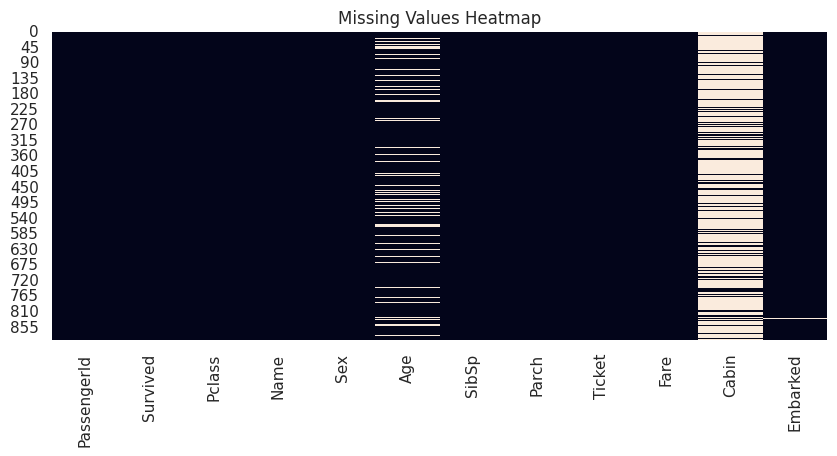

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')


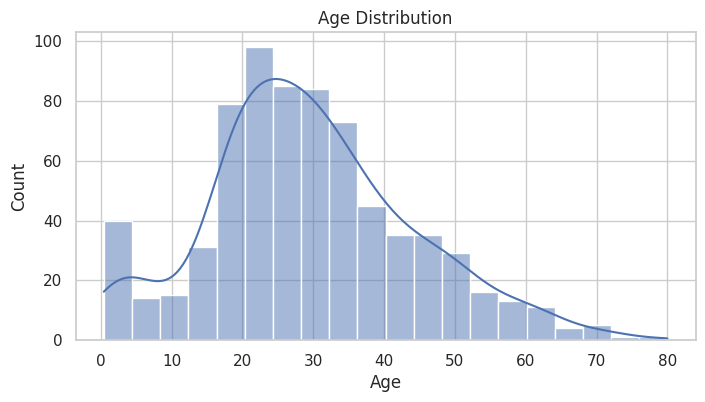

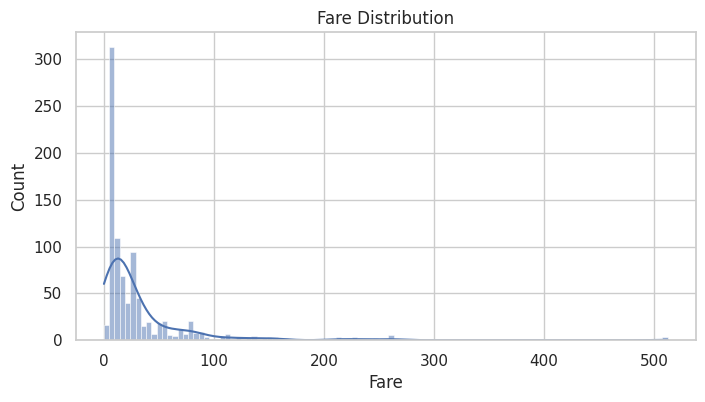

In [ ]:
for col in ['Age', 'Fare']:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'{col} Distribution')
    plt.show()


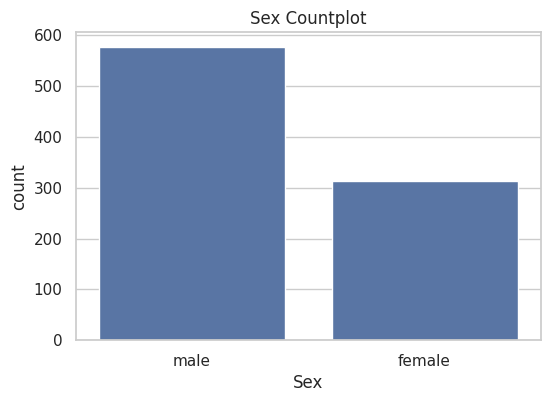

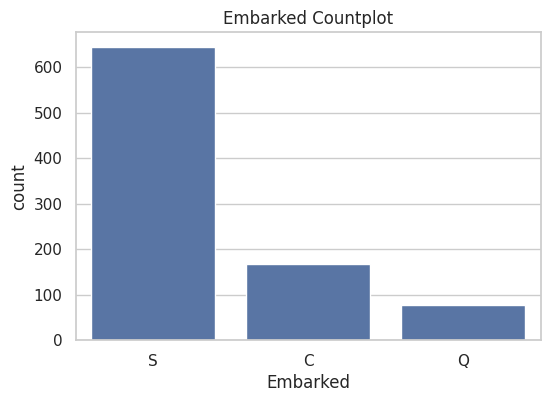

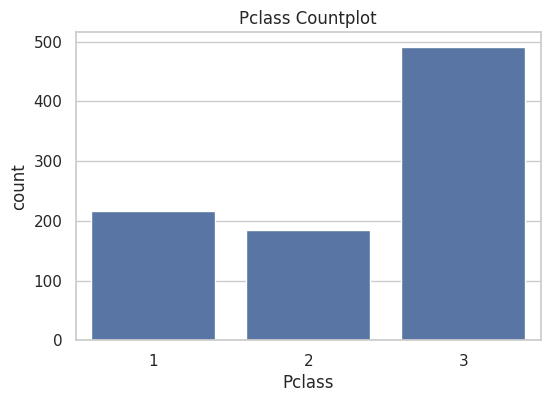

In [ ]:
for col in ['Sex', 'Embarked', 'Pclass']:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Countplot')
    plt.show()


Survival rate by Sex:
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


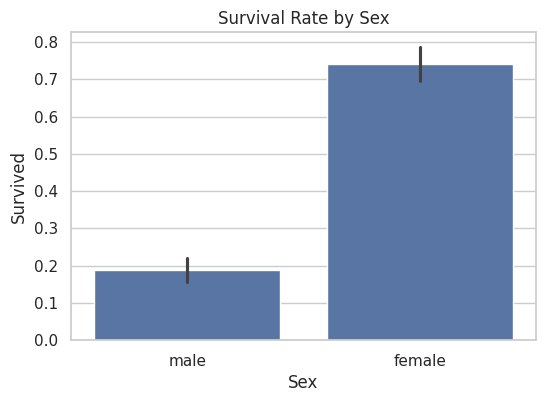

Survival rate by Pclass:
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


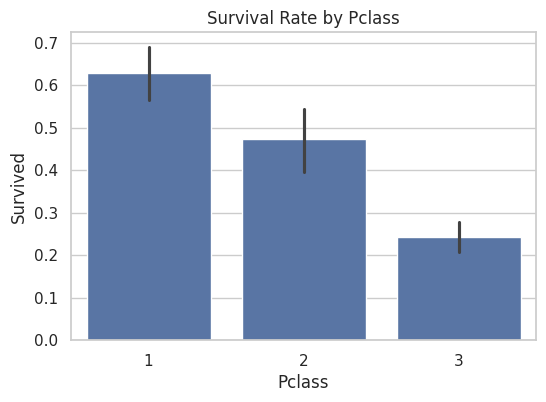

Survival rate by Embarked:
 Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


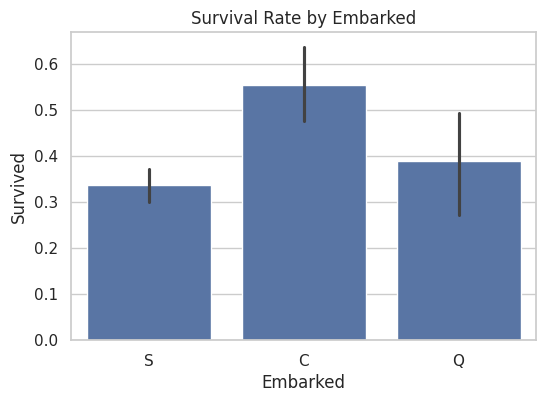

In [ ]:
for col in ['Sex', 'Pclass', 'Embarked']:
    rate = df.groupby(col)['Survived'].mean() * 100
    print(f"Survival rate by {col}:\n", rate)
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Survived', data=df)
    plt.title(f'Survival Rate by {col}')
    plt.show()

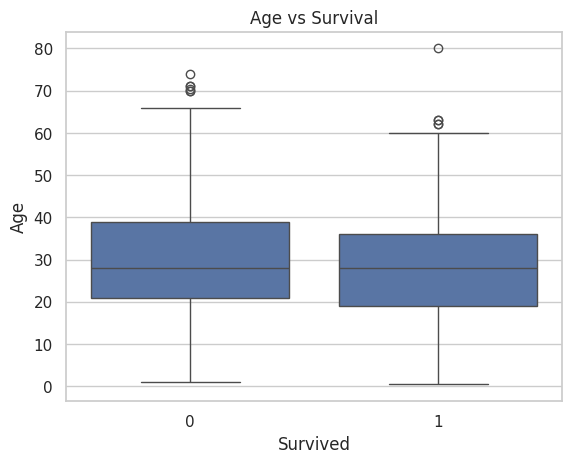

In [ ]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()


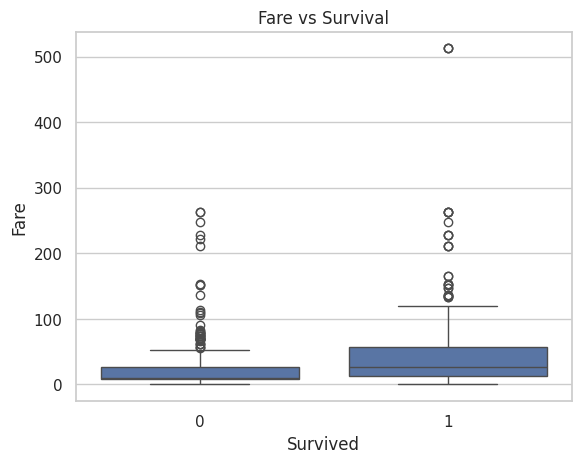

In [ ]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df['Title'] = df['Name'].str.extract(',\s*([^.]*)\s*\.', expand=False)
df['Title'] = df['Title'].replace(['Lady','Countess','Sir','Don','Dona',
                                   'Jonkheer','Rev','Col','Major','Capt'],'Rare')
df['Title'] = df['Title'].map({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'}).fillna(df['Title'])

df['Deck'] = df['Cabin'].str[0].fillna('Unknown')


In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

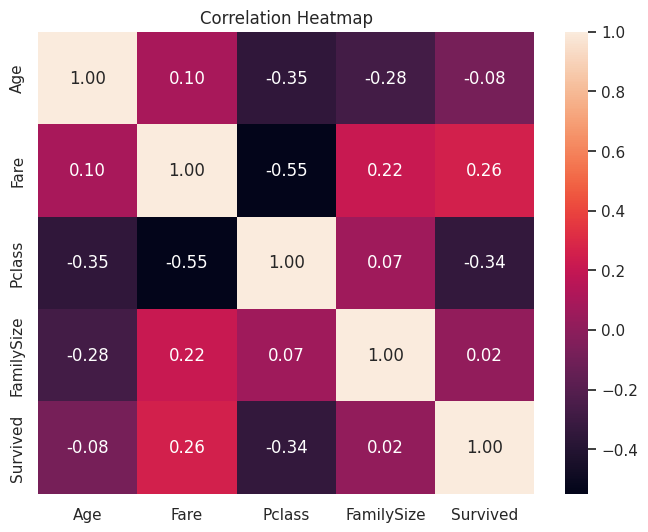

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','Fare','Pclass','FamilySize','Survived']].corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Fare'] < Q1 - 1.5*IQR) | (df['Fare'] > Q3 + 1.5*IQR)]
print("Fare outliers:", outliers.shape[0])


Fare outliers: 116


Fare skewness before log: 4.787316519674893
Fare skewness after log: 0.3949280095189306


Text(0.5, 1.0, 'Log-transformed Fare Distribution')

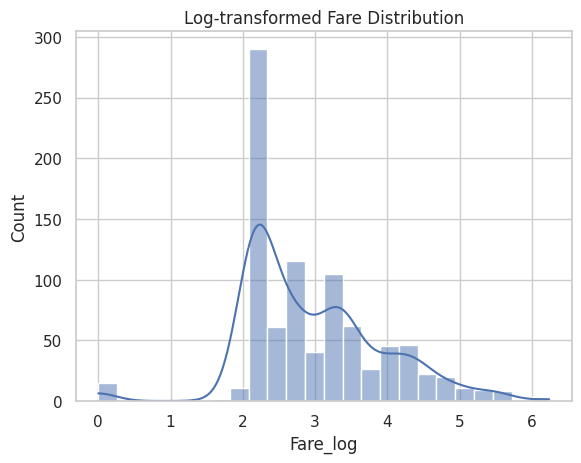

In [ ]:
print("Fare skewness before log:", df['Fare'].skew())
df['Fare_log'] = np.log1p(df['Fare'])
print("Fare skewness after log:", df['Fare_log'].skew())
sns.histplot(df['Fare_log'], kde=True)
plt.title('Log-transformed Fare Distribution')
